In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# set theme
sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (7.0, 3.5),
        "savefig.dpi": 300,
        "figure.autolayout": True,
    },
)

fig_path = Path("../figures")
model = '87lan2e8'

# Load Data

In [13]:
dfs = []
final_rewards = {}
for policy_path in (fig_path / "test_results").iterdir():
    if not policy_path.is_dir():
        continue
    if not model in policy_path.name:
        continue
    rewards = np.load(policy_path / "rewards.npy")
    n_trials, n_steps = rewards.shape
    trial_idx, step_idx = np.mgrid[:n_trials, :n_steps]
    dfs.append(
        pd.DataFrame(
            {
                "n_agents": policy_path.name[len(model) + 1:],
                "trial_idx": trial_idx.flatten(),
                "step_idx": step_idx.flatten(),
                "reward": rewards.flatten(),
            }
        )
    )
    final_rewards[policy_path.name[len(model) + 1:]] = np.mean(rewards, axis=0)[-1]
df = pd.concat(dfs)
df.head()

,n_agents,trial_idx,step_idx,reward
0,40_agents,0,0,0.054054
1,40_agents,0,1,0.058670
2,40_agents,0,2,0.064004
3,40_agents,0,3,0.067723
4,40_agents,0,4,0.069520


# Plot

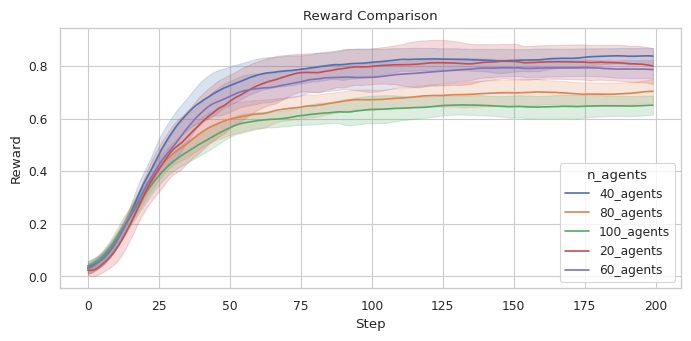

{'40_agents': 0.837353522390685,
 '80_agents': 0.7036823187459217,
 '100_agents': 0.6512051305554357,
 '20_agents': 0.7996228329287923,
 '60_agents': 0.786176476556375}

In [14]:
# Create the line plot
sns.lineplot(
    data=df,
    x="step_idx",
    y="reward",
    hue="n_agents",
    errorbar="sd",
)
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Reward Comparison")

# Save the plot
plt.savefig(fig_path / "comparison.png")
plt.savefig(fig_path / "comparison.pdf")
plt.show()

final_rewards